# Калькулятор шанса побить

In [1]:
import numpy as np
import itertools

from scipy.stats import beta
import scipy.integrate as integrate

import matplotlib.pyplot as plt

Заведем входные данные: 3 варианта, в массиве a будет кол-во успехов, в массиве b - количество испытаний, считать будем с достоверностью e

In [2]:
a = np.array([58, 35, 40])
b = np.array([458 , 421, 501])
e = 0.9

if len(a)==len(b):
    n = len(a)
    print(n, ' experiments')
else:
    print('Wrong data')

3  experiments


In [3]:
def f(x, nbr, a, b):
    n = a.shape[0]
    comp = 1.0
    for i in range(n):
        if (i!=nbr):
            comp = comp * beta.cdf(x,a[i]+1,b[i]+1)
    return (beta.pdf(x,a[nbr]+1,b[nbr]+1)*comp)

In [4]:
beat_chance = list(map(lambda x: integrate.quad(f, 0.0, 1.0, args=(x, a, b))[0], range(n)))

CV = np.array([a[i]/(a[i]+b[i]) for i in range(n)])

intervals = np.array([beta.interval(e, a[i], b[i]) for i in range(n)])
intervals

array([[0.09043647, 0.1360786 ],
       [0.05737817, 0.09824123],
       [0.05638567, 0.09327942]])

In [5]:
xmin =  np.min([beta.ppf(0.0001, a, b) for (a,b) in itertools.zip_longest(a,b)])
xmax =  np.max([beta.ppf(0.9999, a, b) for (a,b) in itertools.zip_longest(a,b)])

x = np.arange(xmin, xmax, 1/1000)

graficdata = np.array([beta.pdf(x,a[i], b[i]) for i in range(n)])

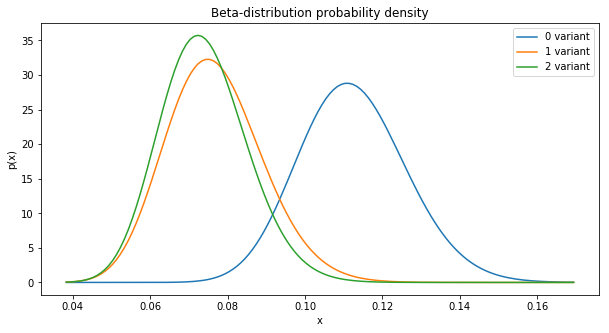

In [6]:
f = plt.figure(figsize=(10,5))

for i in range(n):
    plt.plot(x, graficdata[i], label=str(i)+' variant')

plt.xlabel('x')
plt.ylabel('p(x)')

plt.title("Beta-distribution probability density")

plt.legend()

plt.show()

In [7]:
beat_chance

[0.9574308441203118, 0.028672793440037706, 0.01389636243922829]

Первый вариант выиграл :)